In [18]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components  # 要保留的主成分数
        self.components = None            # 主成分
        self.mean = None                  # 数据的均值

    # PCA算法的核心实现
    def fit(self, X):
        # 1. 数据标准化
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # 2. 计算协方差矩阵
        cov_matrix = np.cov(X.T)

        # 3. 计算协方差矩阵的特征值和特征向量
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # 4. 将特征值进行排序
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]  # 从大到小排序
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # 5. 选取前k个主成分
        self.components = eigenvectors[:self.n_components]

    # 数据转换，返回降维后的数据
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)



In [19]:
# 测试

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载数据
data = load_iris()
X = data.data
y = data.target



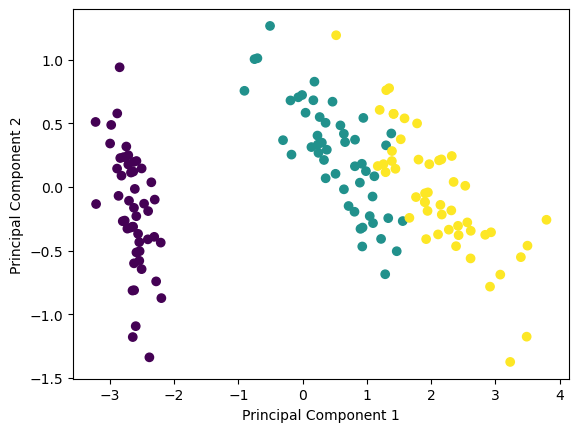

In [20]:
# 使用PCA将数据降至2维
pca = PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)

# 可视化降维后的数据
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()